In [121]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [122]:
glob.glob("*")

['heatmap2.pdf',
 'Untitled.ipynb',
 'HRGP166.genes',
 'HRGP_gene_expression.tsv',
 'HRGP_raw_both_strand.csv',
 'gene_tau_values.tsv',
 'heatmap.pdf']

In [123]:
genes = pd.read_csv("HRGP166.genes",sep="\s",header=None)

/Users/yli11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [124]:
genes.index = genes[0].str.upper()

In [125]:
genes.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,,
AT1G24520,AT1G24520,NaN,AGP50C,NaN,Pollen,specific,NaN,High,NaN,14492.63,NaN,100.000
AT1G31250,AT1G31250,NaN,AGP51C,NaN,not,determined,NaN,None,NaN,NaN,NaN,NaN
AT1G35230,At1g35230,NaN,AGP5C,NaN,Pollen,none,NaN,Low,NaN,15.75,NaN,3.010
AT1G63530,At1g63530,NaN,AGP52C,NaN,Pollen,none,NaN,Low,NaN,25.50,NaN,20.298
AT1G63540,At1g63540,NaN,AGP53C,NaN,Pollen,plus,NaN,Low,NaN,5.46,NaN,100.000


In [126]:
genes.shape

(166, 12)

In [127]:
df = pd.read_csv("HRGP_gene_expression.tsv",sep="\t",index_col=0)

In [128]:
df.shape

(33602, 113)

In [129]:
df.head()

,SRR949989-shoot apical meristem,SRR949988-shoot apical meristem,SRR949965-shoot apical meristem,SRR949956-shoot apical meristem,SRR942022-leaf,SRR934391-leaf,SRR924656-leaf,SRR847506-aerial,SRR847505-aerial,SRR847504-aerial,...,SRR1046909-root,SRR1019437-dark-grown seedling,SRR1019436-dark-grown seedling,SRR1019221-light-grown seedling,SRR1001910-light-grown seedling,SRR1001909-light-grown seedling,SRR070571-light-grown seedling,SRR070570-light-grown seedling,ERR274310-aerial,ERR274309-root
AT1G01010,2.12,1.88,1.52,1.90,5.88,5.81,2.21,4.57,3.60,4.07,...,22.98,24.55,24.15,9.98,6.37,5.31,0.77,0.12,3.53,35.89
AT1G01020,16.22,10.99,11.71,16.48,10.01,10.28,6.48,10.95,9.38,8.79,...,10.95,27.33,31.18,1.59,9.66,11.45,2.81,3.68,25.92,27.00
AT1G01030,4.98,3.69,3.65,2.20,1.39,0.71,2.11,1.65,1.39,0.82,...,0.23,3.92,4.46,5.29,2.26,3.06,0.21,0.37,2.33,0.87
AT1G01040,6.37,9.20,8.03,7.01,9.18,7.30,6.85,10.33,10.18,8.10,...,6.19,18.70,20.44,5.65,6.58,7.32,0.38,0.33,14.95,13.99
AT1G01046,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [130]:
tau = pd.read_csv("gene_tau_values.tsv",sep="\t",index_col=0)

In [131]:
overlaps = set(tau.index).intersection(genes.index)

In [132]:
tmp = tau.loc[overlaps]

In [133]:
tmp.head()

,Tau,Tissue
Gene,,
AT4G30590,0.925581,carpel
AT5G60490,0.369632,root
AT5G25550,0.970895,stage 12 inflorescence
AT1G68725,0.477364,shoot apical meristem
AT1G62760,0.842032,receptacle


In [180]:
HRGP_tau.shape

(166, 2)

In [181]:
HRGP_tau.to_csv("HRGP.tau.csv")

In [134]:
HRGP_tau = pd.DataFrame(genes.index)

In [135]:
HRGP_tau['Tau'] = HRGP_tau[0].map(tmp.Tau.to_dict())

In [136]:
HRGP_tau = HRGP_tau.fillna(0)

In [137]:
HRGP_tau.head()

,0,Tau
0,AT1G24520,0.879327
1,AT1G31250,0.965296
2,AT1G35230,0.781453
3,AT1G63530,0.780356
4,AT1G63540,0.000000


In [138]:
HRGP_exp = df.loc[genes.index]

In [139]:
HRGP_exp.head()

,SRR949989-shoot apical meristem,SRR949988-shoot apical meristem,SRR949965-shoot apical meristem,SRR949956-shoot apical meristem,SRR942022-leaf,SRR934391-leaf,SRR924656-leaf,SRR847506-aerial,SRR847505-aerial,SRR847504-aerial,...,SRR1046909-root,SRR1019437-dark-grown seedling,SRR1019436-dark-grown seedling,SRR1019221-light-grown seedling,SRR1001910-light-grown seedling,SRR1001909-light-grown seedling,SRR070571-light-grown seedling,SRR070570-light-grown seedling,ERR274310-aerial,ERR274309-root
0,,,,,,,,,,,,,,,,,,,,,
AT1G24520,0.48,0.00,0.00,0.00,0.69,0.25,0.06,0.26,0.31,0.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.17,0.00,0.08
AT1G31250,0.00,0.53,0.00,0.00,0.00,0.28,0.07,0.00,0.00,0.26,...,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AT1G35230,0.44,0.42,0.00,0.46,8.50,18.98,1.25,62.69,60.18,16.96,...,1.35,2.80,1.33,4.79,3.68,4.79,0.47,0.16,7.25,5.63
AT1G63530,0.15,0.00,0.16,0.31,8.90,1.03,0.64,7.23,7.79,1.81,...,6.56,2.87,2.26,5.14,2.12,2.36,0.00,0.00,4.76,5.34
AT1G63540,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05


In [140]:
help(sns.color_palette())

Help on _ColorPalette in module seaborn.palettes object:

class _ColorPalette(builtins.list)
 |  _ColorPalette(iterable=(), /)
 |  
 |  Set the color palette in a with statement, otherwise be a list.
 |  
 |  Method resolution order:
 |      _ColorPalette
 |      builtins.list
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |      Open the context.
 |  
 |  __exit__(self, *args)
 |      Close the context.
 |  
 |  as_hex(self)
 |      Return a color palette with hex codes instead of RGB values.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.list:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contai

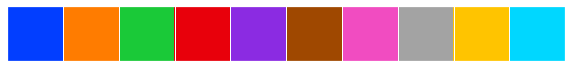

In [141]:
sns.palplot(sns.color_palette("bright"))

In [142]:
network_labels = ["-".join(x.split("-")[1:]) for x in HRGP_exp.columns.tolist()]
used_networks = list(set(network_labels))
network_pal = sns.color_palette("hls", len(used_networks))
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix

network_colors = pd.Series(network_labels, index=HRGP_exp.columns.tolist()).map(network_lut)


In [143]:
df2 = pd.read_csv("HRGP_raw_both_strand.csv",index_col=0)

In [144]:
df2.index = [x.split("|")[0] for x in df2.index]

In [145]:
df2.head()

,gimme_15_BioProspector_w10_5,gimme_33_AMD_Motif8,gimme_101_Improbizer_GTAGCTACGTTGGCTAA,gimme_36_Homer_6_2,gimme_34_AMD_Motif9,gimme_114_MEME_5_w6,gimme_54_Homer_12_5,gimme_77_MDmodule_Motif.8.8,gimme_128_MEME_9_w8,gimme_89_MDmodule_Motif.10.10,...,DME_CGHTGR,DME_CGCGGAGGAGCGTTGA,DME_GTYVGGT,DME_AWWAGRAAGAW,DME_TTGAGAGTTGAACTCA,DME_TCGCGGAGGAGCG,DME_TGTGAAATCT,DME_CWGAGAT,DME_CGASAAT,class
AT3G57690,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
AT2G18470,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
AT4G33970,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AT3G18810,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
AT3G01700,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [146]:
class_label = df2[['class']]

In [147]:
class_label['class'] = class_label['class'].map({1:"Pollen-Specific HRGP",0:"Non-pollen HRGP"})

/Users/yli11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
class_label

,class
AT3G57690,Pollen-Specific HRGP
AT2G18470,Pollen-Specific HRGP
AT4G33970,Pollen-Specific HRGP
AT3G18810,Pollen-Specific HRGP
AT3G01700,Pollen-Specific HRGP
...,...
AT5G03170,Non-pollen HRGP
AT4G28365,Non-pollen HRGP
AT4G22470,Non-pollen HRGP
AT4G32490,Non-pollen HRGP


In [149]:
HRGP_exp = HRGP_exp.loc[class_label.index]

In [150]:
HRGP_exp.shape

(145, 113)

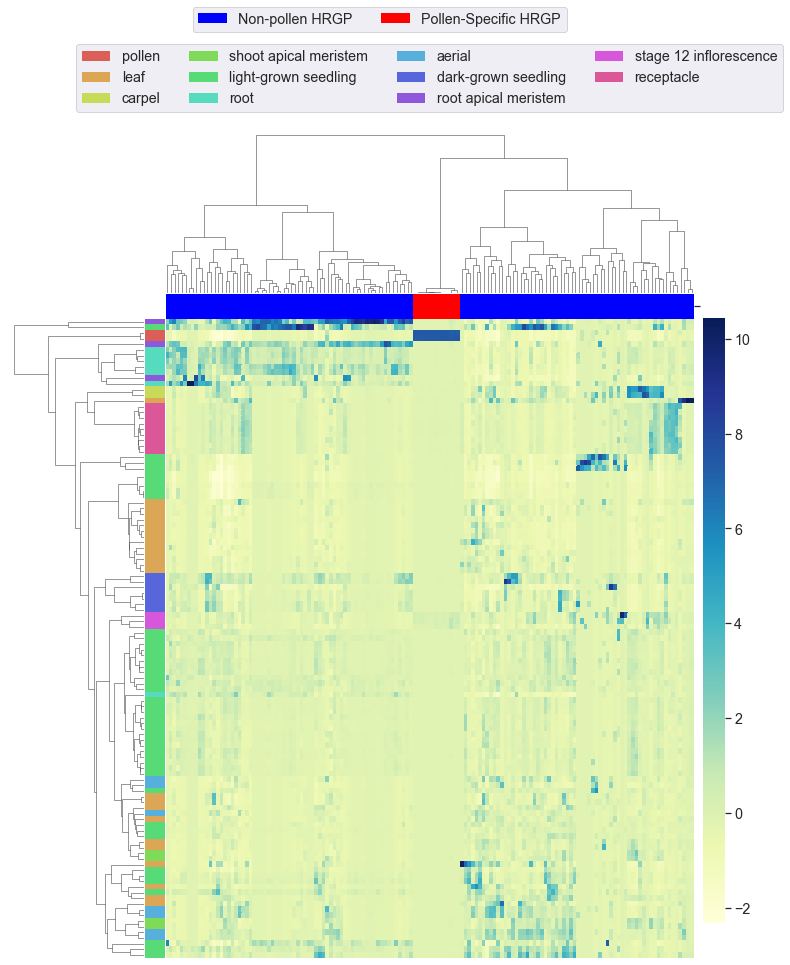

In [179]:
network_labels2 = class_label['class'].tolist()
used_networks2 = list(set(network_labels2))
network_pal2 = ['blue','red']
network_lut2 = dict(zip(map(str, used_networks2), network_pal2))
network_colors2 = pd.Series(network_labels2, index=class_label.index.tolist()).map(network_lut2)

network_labels2 = ["-".join(x.split("-")[1:]) for x in HRGP_exp.columns.tolist()]
used_networks = list(set(network_labels))
used_networks = list(set(['pollen']+used_networks))
network_pal = sns.color_palette("hls", len(used_networks))
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(network_labels, index=HRGP_exp.columns.tolist()).map(network_lut)

sns.set(font_scale=1.3)

# sns.clustermap(HRGP_exp.T,cmap="YlGnBu",z_score=1,figsize=(10,20),yticklabels=False,xticklabels=False)
g=sns.clustermap(HRGP_exp.T,cmap="YlGnBu",yticklabels=False,
                 xticklabels=False,row_colors=network_colors,
                 col_colors=network_colors2,method="ward",
                 z_score=1,figsize=(10,12))
# Draw the legend bar for the classes                 
for label in used_networks:
    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=4,bbox_to_anchor=(0.5,1.3))

for label in used_networks2:
    g.ax_row_dendrogram.bar(0, 0, color=network_lut2[label],
                            label=label, linewidth=0)
g.ax_row_dendrogram.legend(loc=2, ncol=2,bbox_to_anchor=(1.3,1.5))
# plt.xlabel("166 HRGP genes")
# plt.ylabel("113 RNA-seq samples")
# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([0.99, .06, .03, .7])
plt.savefig("heatmap2.pdf", bbox_inches='tight')

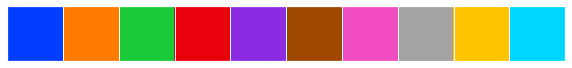

In [152]:
sns.palplot(sns.color_palette("bright"))

In [153]:
tau.head()

,Tau,Tissue
Gene,,
AT1G01010,0.496275,root
AT1G01020,0.237011,dark-grown seedling
AT1G01030,0.689980,carpel
AT1G01040,0.325299,carpel
AT1G01050,0.143455,root


In [154]:
genes

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,,
AT1G24520,AT1G24520,NaN,AGP50C,NaN,Pollen,specific,NaN,High,NaN,14492.63,NaN,100.000
AT1G31250,AT1G31250,NaN,AGP51C,NaN,not,determined,NaN,None,NaN,NaN,NaN,NaN
AT1G35230,At1g35230,NaN,AGP5C,NaN,Pollen,none,NaN,Low,NaN,15.75,NaN,3.010
AT1G63530,At1g63530,NaN,AGP52C,NaN,Pollen,none,NaN,Low,NaN,25.50,NaN,20.298
AT1G63540,At1g63540,NaN,AGP53C,NaN,Pollen,plus,NaN,Low,NaN,5.46,NaN,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G62500,At1g62500,NaN,PRP14,NaN,Pollen,none,NaN,Low,NaN,9.45,NaN,0.234
AT2G10940,At2g10940,NaN,PRP15,NaN,Pollen,none,NaN,Low,NaN,27.11,NaN,0.883
AT3G22120,At3g22120,NaN,PRP16,NaN,Pollen,none,NaN,Low,NaN,4.51,NaN,0.183


In [189]:
HRGP_exp2 = df.loc[genes.index]

In [190]:
HRGP_exp2.shape

(166, 113)

In [191]:
pollen_col = []
for c in HRGP_exp2.columns:
    if "pollen" in c:
        pollen_col.append(c)
HRGP_exp2 = HRGP_exp2[pollen_col]    

In [192]:
HRGP_exp2 = pd.DataFrame(HRGP_exp2.mean(axis=1))

In [193]:
HRGP_exp2

,0
0,
AT1G24520,9906.370
AT1G31250,0.115
AT1G35230,0.090
AT1G63530,0.000
AT1G63540,0.000
...,...
AT1G62500,0.000
AT2G10940,0.060
AT3G22120,0.000


In [ ]:
HRGP_exp2.to_csv("HRGP_pollen_exp.csv",heade)